In [33]:
import meshio
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gmsh

In [34]:
gmsh.initialize()
mesh = gmsh.open("meshes/test.msh")
print(mesh)

gmsh.finalize()

None


In [22]:
mesh = meshio.read("meshes/test.msh")

nodes = mesh.points

elements = mesh.cells_dict
triangles = elements.get("triangle", [])  # Get triangles (if applicable)

In [30]:
# Extract physical group IDs for elements
physical_groups = mesh.cell_data_dict.get("gmsh:physical", None)

print(physical_groups)

{'vertex': array([0, 0, 0, 0], dtype=int32), 'line': array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), 'triangle': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


In [25]:
G = nx.Graph()


for i, point in enumerate(nodes):
    G.add_node(i, pos=point)

# Add edges based on element connectivity
for triangle in triangles:
    for i in range(3):
        G.add_edge(triangle[i], triangle[(i + 1) % 3])  # Connect nodes

print(G)

Graph with 12 nodes and 25 edges
[[ 8 10  9]
 [11  8  4]
 [11 10  8]
 [ 8  9  7]
 [ 6  9 10]
 [ 7  9  2]
 [ 9  6  2]
 [11  5 10]
 [ 6 10  3]
 [ 8  7  0]
 [11  4  1]
 [ 4  8  0]
 [ 5 11  1]
 [10  5  3]]


In [27]:
print("Available element types:", mesh.cells_dict.keys())

Available element types: dict_keys(['vertex', 'line', 'triangle'])


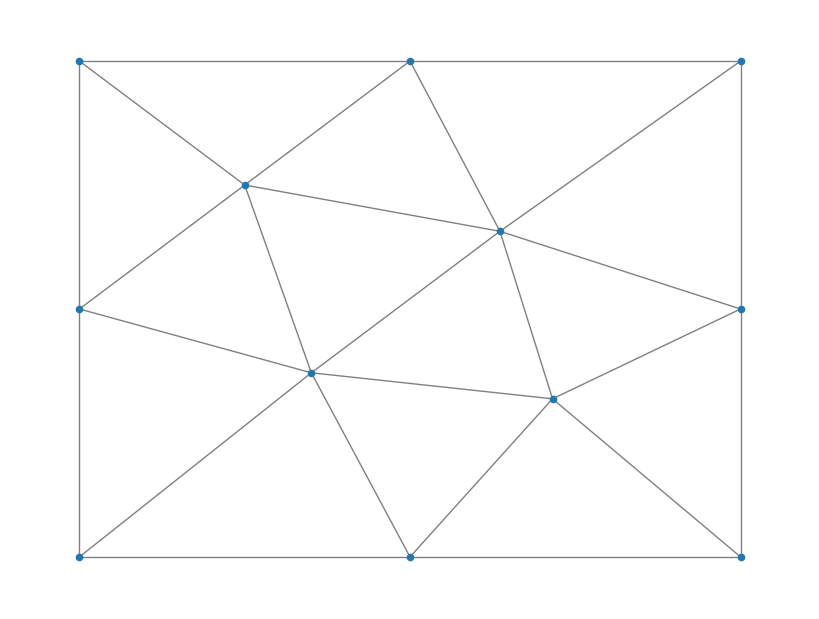

In [29]:

pos = {i: (p[0], p[1]) for i, p in enumerate(nodes)}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_size=20, edge_color="gray")
plt.show()
